# 

In [367]:
#set to store evaluation metrix from models
all_eval_metrics = []

# Import Libraries

In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting as pdplt
import seaborn as sns
import math
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,QuantileTransformer,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from random import randint
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score

# Load Dataset

In [369]:
spam = pd.read_csv( "spambase_remake.csv")

# Display dataframe
print(spam.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [370]:
# information about data

spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

# Data Exploration And Preprocessing

1. Checking Missing Values


In [371]:
# Check if there is missing values
missing = spam.isnull().sum()

# Printing numbers of missing values in each column
print("Missing Values")
print(missing)


Missing Values
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet         

There are no missing values in the dataset

2. Check the class distribution

In [372]:
class_counts = spam['spam'].value_counts()

# Print the class distribution
print("Class distribution:")
print(class_counts)
print(spam.shape)



Class distribution:
0    2788
1    1813
Name: spam, dtype: int64
(4601, 58)


There is  imbalance between spam and non spam data so resampling will be needed.

3. distribution of each feature

In [373]:
# Displaying distribution of each feature
print("Distribution of each feature:")
print(spam.describe())

Distribution of each feature:
       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   


4. Checking correlation between the features

Correlation between features:
                            word_freq_make  word_freq_address  word_freq_all  \
word_freq_make                    1.000000          -0.016759       0.065627   
word_freq_address                -0.016759           1.000000      -0.033526   
word_freq_all                     0.065627          -0.033526       1.000000   
word_freq_3d                      0.013273          -0.006923      -0.020246   
word_freq_our                     0.023119          -0.023760       0.077734   
word_freq_over                    0.059674          -0.024840       0.087564   
word_freq_remove                  0.007669           0.003918       0.036677   
word_freq_internet               -0.003950          -0.016280       0.012003   
word_freq_order                   0.106263          -0.003826       0.093786   
word_freq_mail                    0.041198           0.032962       0.032075   
word_freq_receive                 0.188459          -0.006864       0.048254   
word_freq_

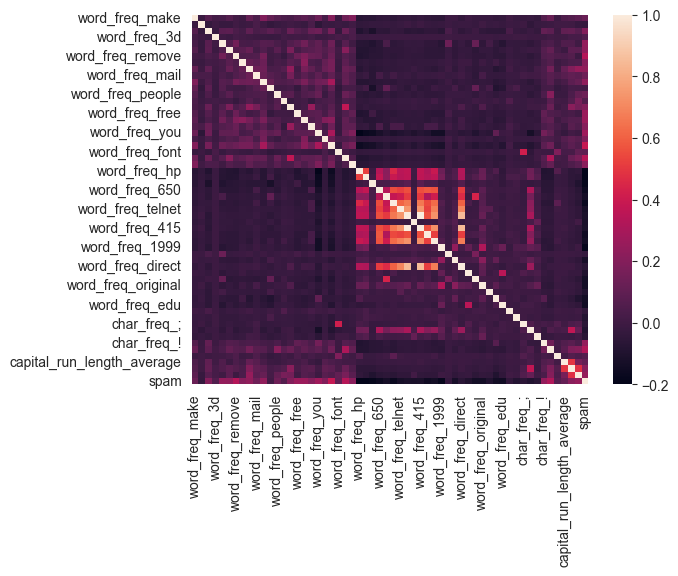

In [374]:
# the correlation matrix
correlation_matrix = spam.corr()

# Display the correlation matrix
print("Correlation between features:")
print(correlation_matrix)

#heatmap to visualize the correlation matrix between features
correlation_matrix = spam.corr()
sns.heatmap(correlation_matrix, vmin=-0.2, vmax=1)
plt.show()

C:\Users\kasun\AppData\Local\Temp\ipykernel_26024\2088957206.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(correlations.index, rotation=90)


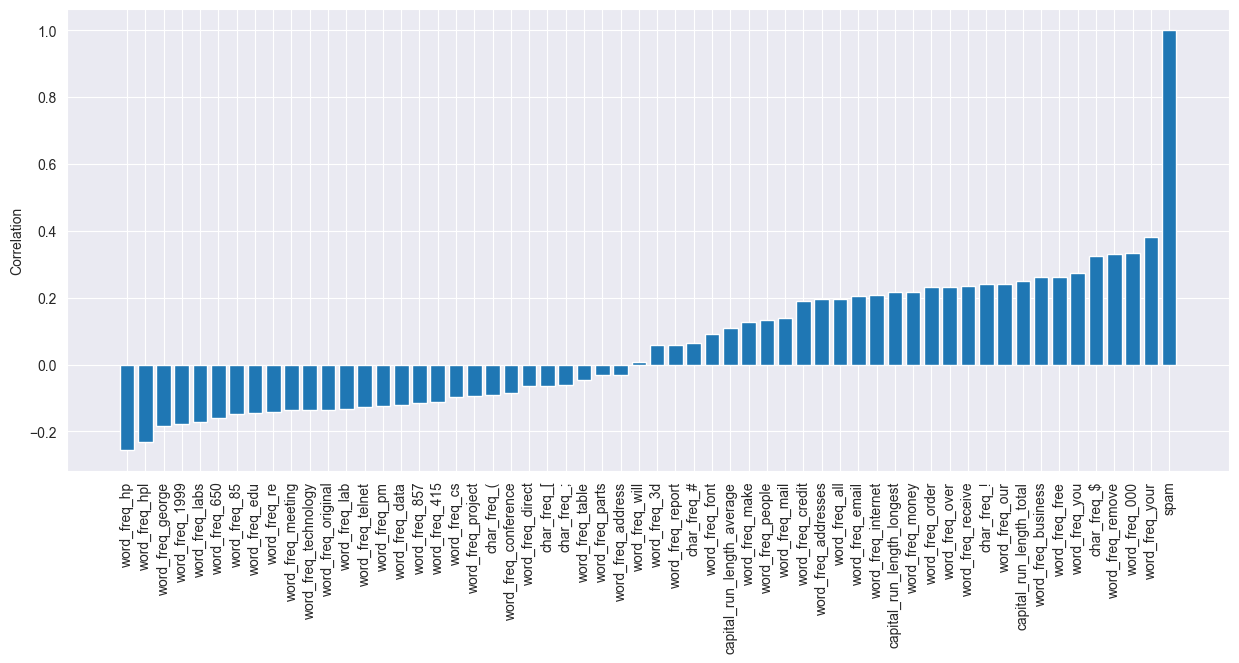

In [375]:
#correlation between feature and the target variable
correlations = spam.corr()['spam'].sort_values()

#bar chart of the correlations
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(correlations.index, correlations)
ax.set_xticklabels(correlations.index, rotation=90)
ax.set_ylabel('Correlation')
plt.show()


It seems there is good correlation between some features so trying dimensionality reduction method like PCA may improve model performance.

5. Visualize the distribution of each feature

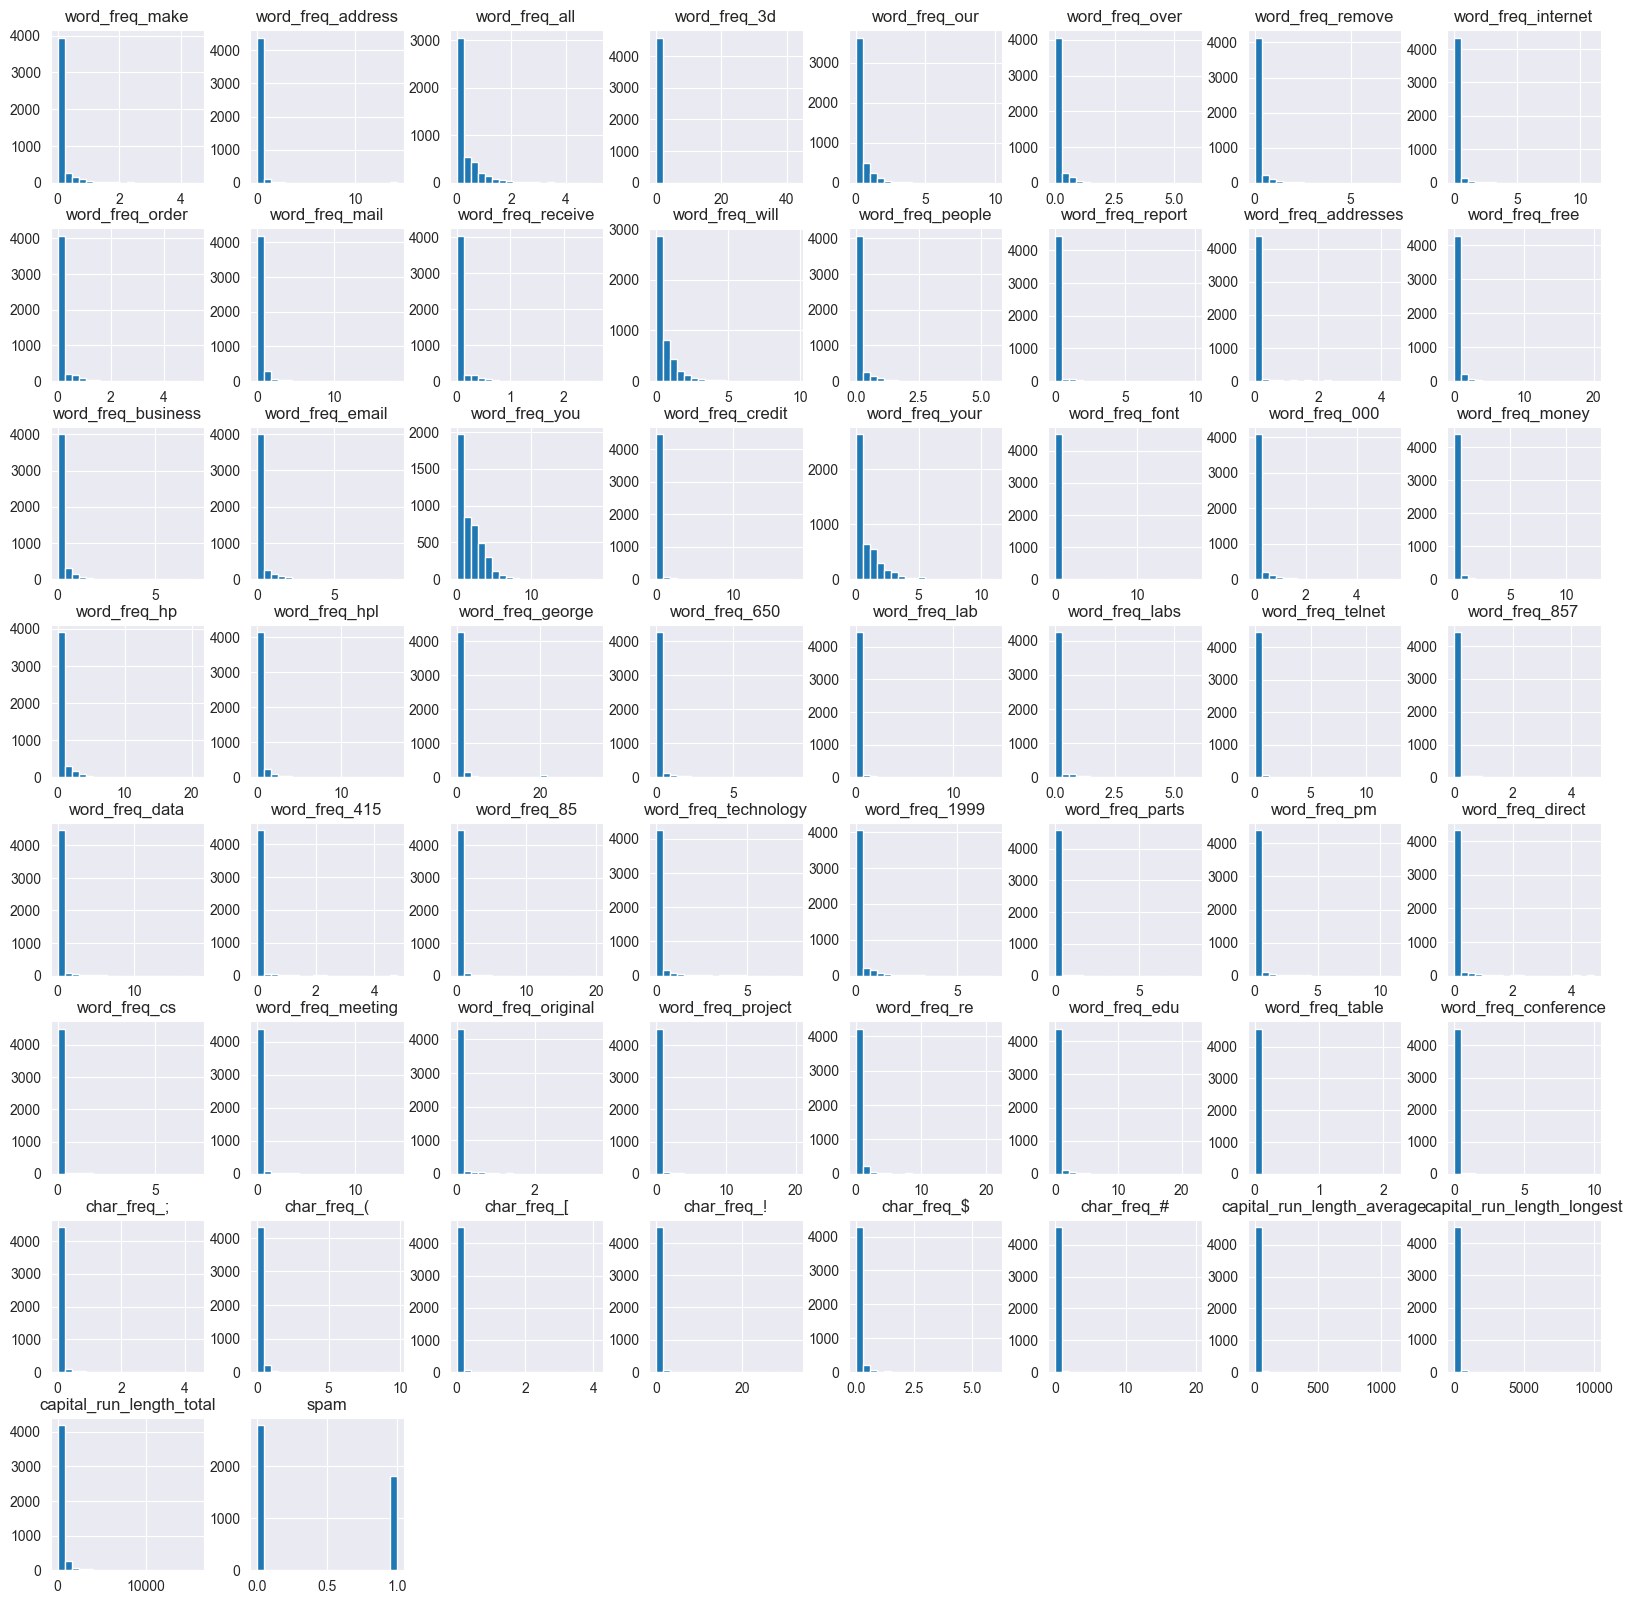

In [376]:
#histograms to visualize the distribution of each feature
spam.hist(figsize=(20,20), bins=20)
plt.show()

6. Finding Outliers

IndexError: index 50 is out of bounds for axis 0 with size 50

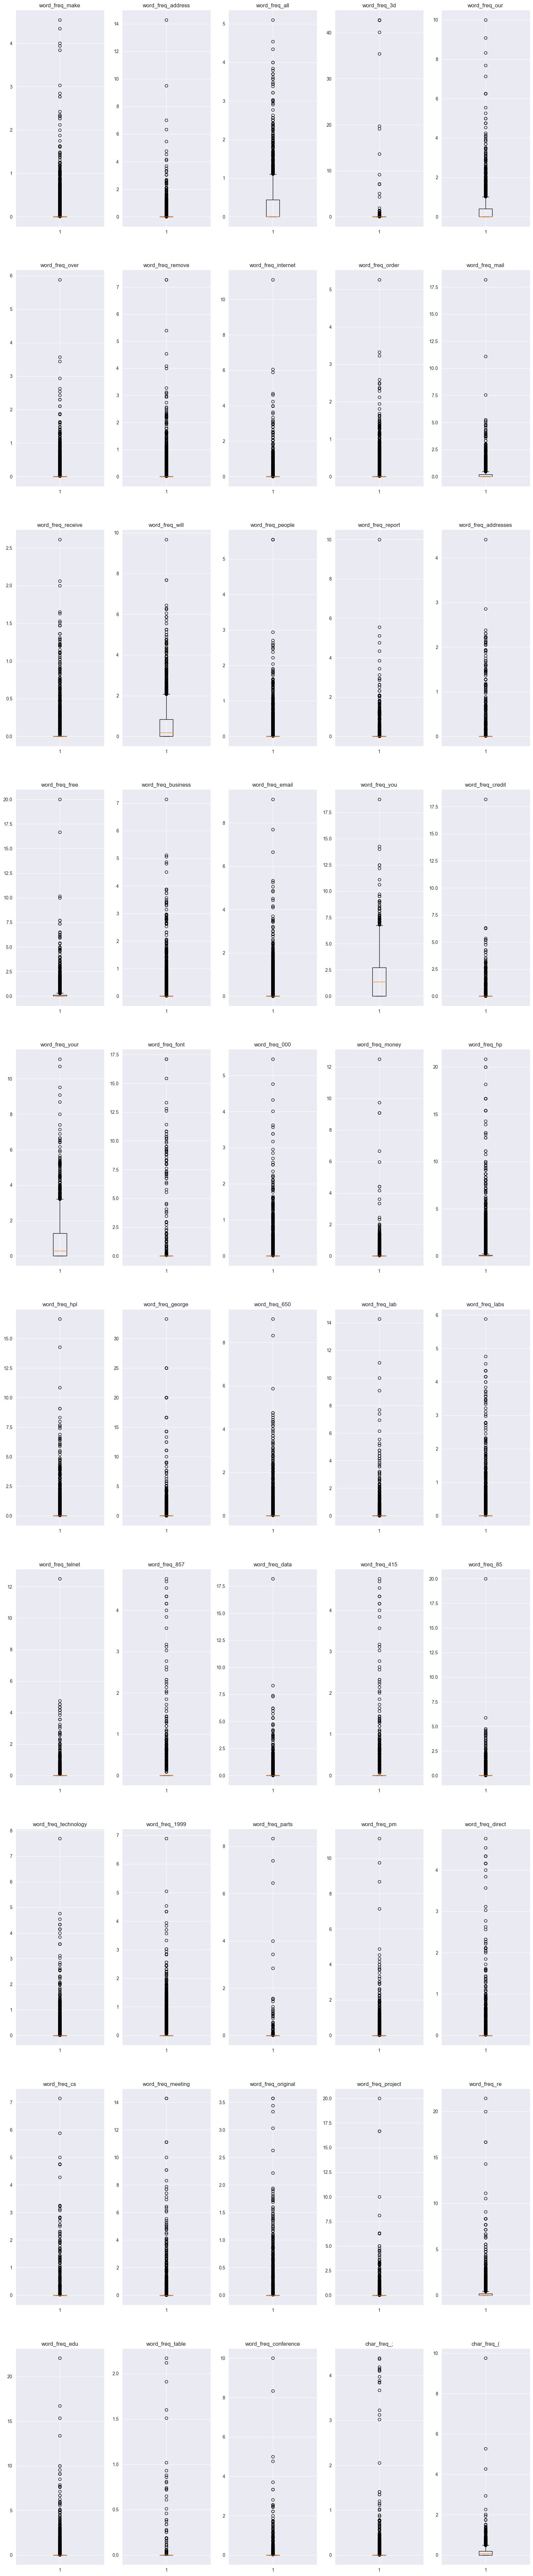

In [403]:
#Plotting box plots to identify outliers
fig, axs = plt.subplots(ncols=5, nrows=10, figsize=(20, 100))
axs = axs.flatten()
for i, col in enumerate(spam.columns[:-1]):
    axs[i].boxplot(spam[col])
    axs[i].set_title(col)

plt.show()

In [378]:
# calculate z-scores
z_scores = stats.zscore(spam)

# set a limit for z-score
zScoreLimit = 3

# find the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > zScoreLimit)

# calculate the total number of outliers
num_outliers = len(outlier_indices[0])

print("Total number of outliers = ", num_outliers)


Total number of outliers =  4134


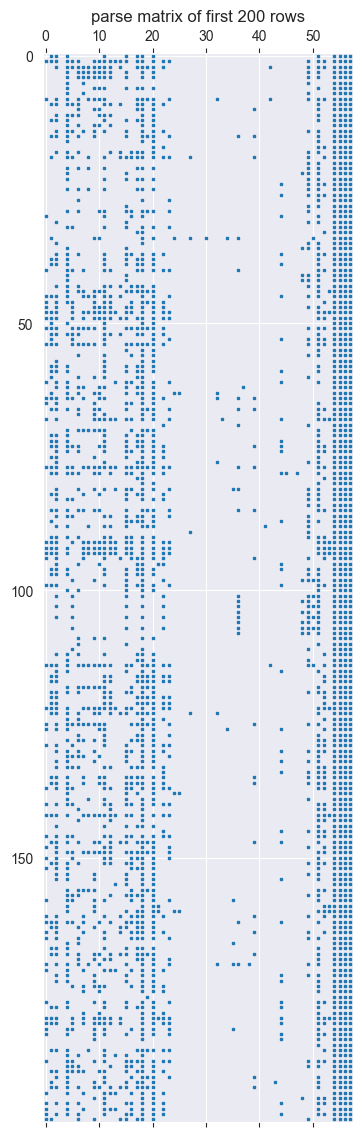

In [379]:
#Plotting Sparse Matrix
plt.figure(figsize=[4, 600])
plt.title('parse matrix of first 200 rows')
# first 200 and precision is set to 0.1
plt.spy(spam.head(200), precision=0.1, markersize=2)
plt.show()


According to the z-score method, there seem to be around 4000 outliers in the dataset. Since the majority of data points are close to zero, a small deviation from the mean can result in a large change in z-score, resulting in the identification of a large number of potential outliers. Therefore, I analyse the above distribution of each feature and box plot. In my view, there are only a few significant outliers. Furthermore, we cannot guarantee that those are true outliers because they could be special cases. As a result, I decided not to remove any outliers from the dataframe

7. Removing Duplicate Records

In [380]:
# Counting the number of duplicate rows
duplicates = spam.duplicated().sum()
print("Duplicate rows = ", duplicates)

# Drop the duplicate rows and update the dataset
spam.drop_duplicates(inplace=True)

# Verify there are no more duplicate records
assert spam.duplicated().sum() == 0
print("No more duplicate records")

Duplicate rows =  391
No more duplicate records


There were 391 duplicate rows, so those records were dropped from the dataframe.

8. Data Oversampling

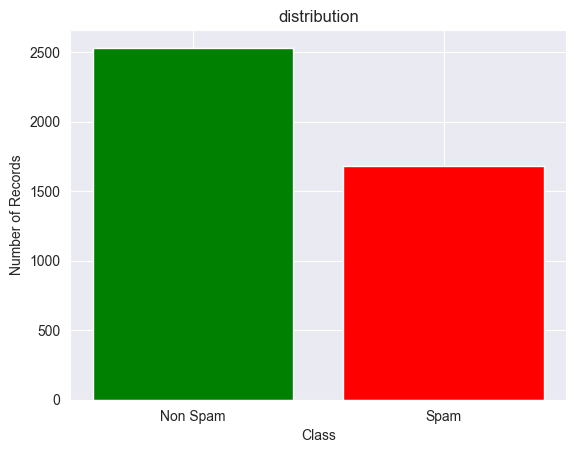

In [381]:
distribution = spam['spam'].value_counts()

# Plotting class distribution
plt.bar(distribution.index, distribution.values,color=['green', 'red'])
plt.xticks(distribution.index, ['Non Spam', 'Spam'])
plt.xlabel('Class')
plt.ylabel('Number of Records')
plt.title('distribution')
plt.show()


As the observation, there are imbalances in the data. spam data are undersampled. so we have to oversample those data. I chose SMOTE method as the oversampling method.

In [382]:
from sklearn.model_selection import train_test_split

# Applying SMOTE
columns = spam.columns
X = spam.drop(['spam'],axis=1)
Y = spam['spam']

# Splitting Data into train and test before applying the smote
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1)
sm = SMOTE(random_state=1)

# feeding train data to smote
X_train, Y_train = sm.fit_resample(X_train, Y_train)

spam_final_train = pd.DataFrame(X_train, columns=columns)
spam_final_train['spam'] = Y_train

# Print new train dataframe shape
print(spam_final_train.shape)
print(spam_final_train['spam'].value_counts())

# Saving the new train dataset
spam_final_train.to_csv('spam_final_train.csv', index=False)


spam_final_test = pd.DataFrame(X_test, columns=columns)
spam_final_test['spam'] = Y_test
# Print new test dataframe shape
print(spam_final_test.shape)
print(spam_final_test['spam'].value_counts())
# Saving the new test dataset
spam_final_test.to_csv('spam_final_test.csv', index=False)


(4024, 58)
0    2012
1    2012
Name: spam, dtype: int64
(842, 58)
0    519
1    323
Name: spam, dtype: int64


In the above steps, I did oversampling only for the train data to ensure the test data wasn't biased.

# Model Building And The Approach

# 1. KNN Model

# Without PCA And Using StandardScaler (Model Name = KNN_SS)

In [383]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Creating the KNN model
knn = KNeighborsClassifier()

# hyperparameters Search
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13], 'metric': ['euclidean', 'manhattan']}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(knn, param_grid=parameters, cv=5)
gridSearch.fit(X_train_scaled, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))
# Printing classification report
print(classification_report(y_test, test_pred))

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Append the evaluation metrics to the global list
all_eval_metrics.append([accuracy, precision, recall, f1])

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best training Score: 0.9182463459102006
Testing Set Accuracy: 0.9049881235154394
Training Set Accuracy: 0.9666998011928429
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       519
           1       0.88      0.87      0.88       323

    accuracy                           0.90       842
   macro avg       0.90      0.90      0.90       842
weighted avg       0.90      0.90      0.90       842



# Without PCA And Using MinMaxScaler (Model Name = KNN_MM)

In [384]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Creating the KNN model
knn = KNeighborsClassifier()

# hyperparameters Search
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13], 'metric': ['euclidean','manhattan']}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(knn, param_grid=parameters, cv=5)
gridSearch.fit(X_train_scaled, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))
# Printing classification report
print(classification_report(y_test, test_pred))
# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Append the evaluation metrics to the global list
all_eval_metrics.append([accuracy, precision, recall, f1])

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best training Score: 0.9083072216556968
Testing Set Accuracy: 0.8883610451306413
Training Set Accuracy: 0.9617296222664016
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       519
           1       0.86      0.85      0.85       323

    accuracy                           0.89       842
   macro avg       0.88      0.88      0.88       842
weighted avg       0.89      0.89      0.89       842



# Without PCA And Using QuantileTransformer (Model Name = KNN_QT)

In [385]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using QuantileTransformer

scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the KNN model
knn = KNeighborsClassifier()

# hyperparameters Search
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13], 'metric': ['euclidean','manhattan']}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(knn, param_grid=parameters, cv=5)
gridSearch.fit(X_train_scaled, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))
# Printing classification report
print(classification_report(y_test, test_pred))
# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Append the evaluation metrics to the global list
all_eval_metrics.append([accuracy, precision, recall, f1])

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3}
Best training Score: 0.9403612372918019
Testing Set Accuracy: 0.9524940617577197
Training Set Accuracy: 0.9731610337972167
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       519
           1       0.93      0.95      0.94       323

    accuracy                           0.95       842
   macro avg       0.95      0.95      0.95       842
weighted avg       0.95      0.95      0.95       842



# With PCA And Using StandardScaler (Model Name = KNN_PCA_SS)

In [386]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(0.8)
X_trainPCA = pca.fit_transform(X_train_scaled)
X_testPCA = pca.transform(X_test_scaled)

# Creating the KNN model
knn = KNeighborsClassifier()

# hyperparameters Search
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13], 'metric': ['euclidean','manhattan']}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(knn, param_grid=parameters, cv=5)
gridSearch.fit(X_trainPCA, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_testPCA)
train_pred = gridSearch.predict(X_trainPCA)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))
# Printing classification report
print(classification_report(y_test, test_pred))
# Evaluate the model on testing set
test_pred = gridSearch.predict(X_testPCA)
train_pred = gridSearch.predict(X_trainPCA)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Append the evaluation metrics to the global list
all_eval_metrics.append([accuracy, precision, recall, f1])

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3}
Best training Score: 0.9100410988535584
Testing Set Accuracy: 0.8847980997624703
Training Set Accuracy: 0.9565109343936382
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       519
           1       0.83      0.88      0.85       323

    accuracy                           0.88       842
   macro avg       0.88      0.88      0.88       842
weighted avg       0.89      0.88      0.89       842



# With PCA And Using MinMaxScaler (Model Name = KNN_PCA_MM)

In [387]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(0.8)
X_trainPCA = pca.fit_transform(X_train_scaled)
X_testPCA = pca.transform(X_test_scaled)

# Creating the KNN model
knn = KNeighborsClassifier()

# hyperparameters Search
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13], 'metric': ['euclidean','manhattan']}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(knn, param_grid=parameters, cv=5)
gridSearch.fit(X_trainPCA, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_testPCA)
train_pred = gridSearch.predict(X_trainPCA)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))
# Printing classification report
print(classification_report(y_test, test_pred))
# Evaluate the model on testing set
test_pred = gridSearch.predict(X_testPCA)
train_pred = gridSearch.predict(X_trainPCA)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Append the evaluation metrics to the global list
all_eval_metrics.append([accuracy, precision, recall, f1])

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3}
Best training Score: 0.8856911096690461
Testing Set Accuracy: 0.8705463182897862
Training Set Accuracy: 0.9455765407554672
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       519
           1       0.81      0.87      0.84       323

    accuracy                           0.87       842
   macro avg       0.86      0.87      0.86       842
weighted avg       0.87      0.87      0.87       842



# With PCA And Using QuantileTransformer (Model Name = KNN_PCA_QT)

In [388]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using QuantileTransformer

scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
pca = PCA(0.8)
X_trainPCA = pca.fit_transform(X_train_scaled)
X_testPCA = pca.transform(X_test_scaled)

# Creating the KNN model
knn = KNeighborsClassifier()

# hyperparameters Search
parameters = {'n_neighbors': [3, 5, 7, 9, 11, 13], 'metric': ['euclidean','manhattan']}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(knn, param_grid=parameters, cv=5)
gridSearch.fit(X_trainPCA, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_testPCA)
train_pred = gridSearch.predict(X_trainPCA)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))
# Printing classification report
print(classification_report(y_test, test_pred))
# Evaluate the model on testing set
test_pred = gridSearch.predict(X_testPCA)
train_pred = gridSearch.predict(X_trainPCA)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Append the evaluation metrics to the global list
all_eval_metrics.append([accuracy, precision, recall, f1])

Best parameters: {'metric': 'euclidean', 'n_neighbors': 5}
Best training Score: 0.9391190012669572
Testing Set Accuracy: 0.9418052256532067
Training Set Accuracy: 0.9592445328031809
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       519
           1       0.93      0.91      0.92       323

    accuracy                           0.94       842
   macro avg       0.94      0.94      0.94       842
weighted avg       0.94      0.94      0.94       842



# 2.Decision Tree

# Without PCA And Using StandardScaler (Model Name = DT_SS)

Best parameters: {'criterion': 'entropy', 'max_depth': 17, 'max_features': 13, 'min_samples_leaf': 7, 'min_samples_split': 20}
Best training Score: 0.9179966626494854
Testing Set Accuracy: 0.9097387173396675
Training Set Accuracy: 0.9440854870775348
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       519
           1       0.89      0.87      0.88       323

    accuracy                           0.91       842
   macro avg       0.91      0.90      0.90       842
weighted avg       0.91      0.91      0.91       842



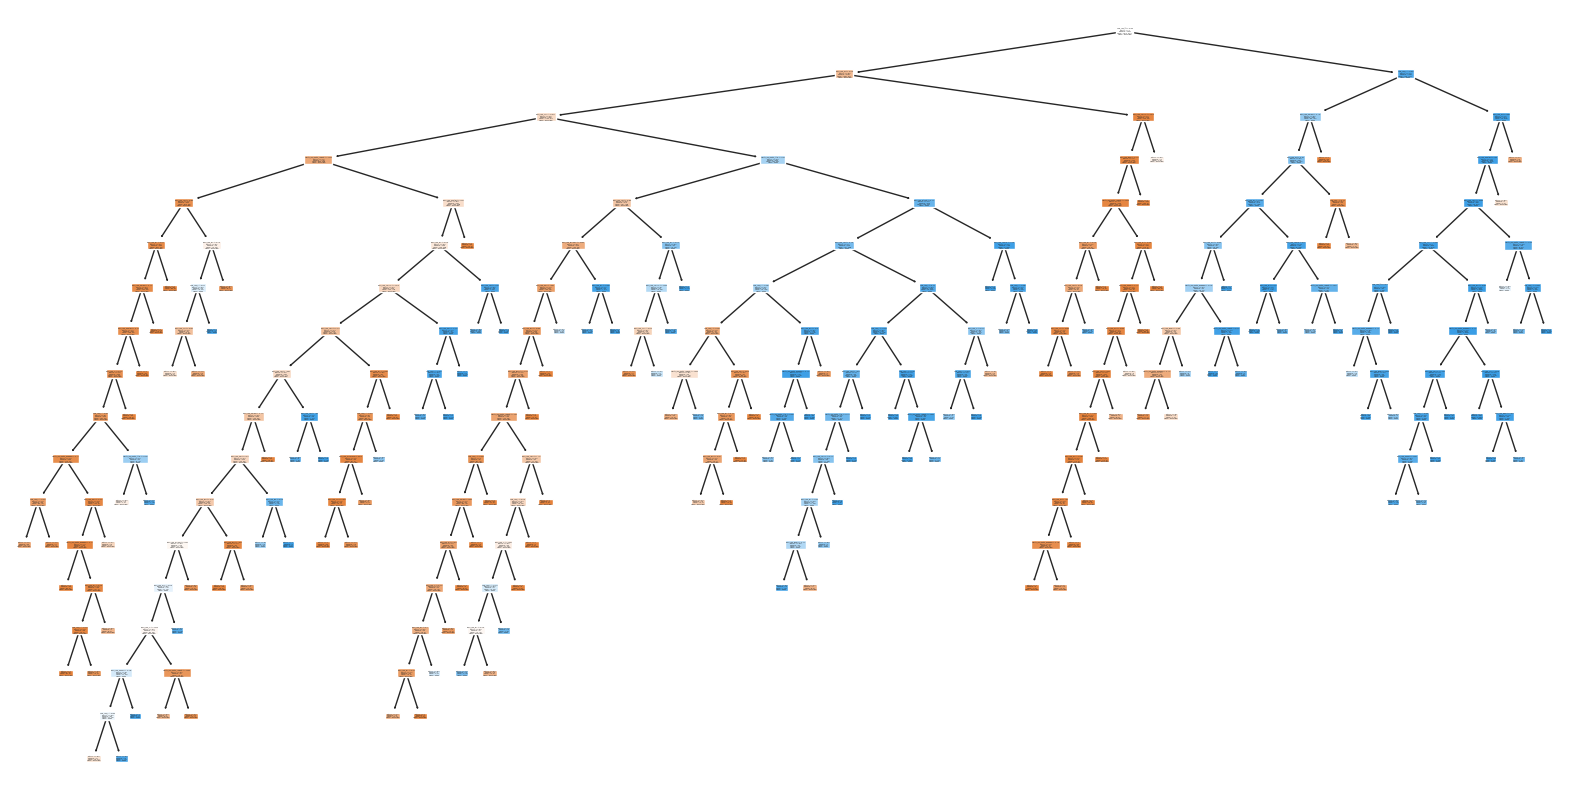

In [389]:

# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the Decision Tree model
tree = DecisionTreeClassifier(random_state=1)

# hyperparameters Search
parameters  = {"max_depth": [None, 3, 5, 7, 9, 11, 13, 15, 17, 19],
              "max_features": [3, 5, 7, 9, 11, 13,],
              "min_samples_leaf": [randint(1, 9)],
              "min_samples_split": [2, 5, 10, 15, 20, 25, 30],
              "criterion": ["gini", "entropy"]}


# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(tree, param_grid=parameters, cv=5)
gridSearch.fit(X_train_scaled, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))

# Printing classification report
print(classification_report(y_test, test_pred))

plt.figure(figsize=(20, 10))
plot_tree(gridSearch.best_estimator_, feature_names=X_train.columns, class_names=['Non-Spam', 'Spam'], filled=True)
plt.show()
# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Append the evaluation metrics to the global list
all_eval_metrics.append([accuracy, precision, recall, f1])

# Without PCA And Using MinMaxScaler (Model Name = DT_MM)

Best parameters: {'criterion': 'entropy', 'max_depth': 19, 'max_features': 13, 'min_samples_leaf': 3, 'min_samples_split': 25}
Best training Score: 0.9167547356385773
Testing Set Accuracy: 0.8895486935866983
Training Set Accuracy: 0.9460735586481114
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       519
           1       0.84      0.89      0.86       323

    accuracy                           0.89       842
   macro avg       0.88      0.89      0.88       842
weighted avg       0.89      0.89      0.89       842



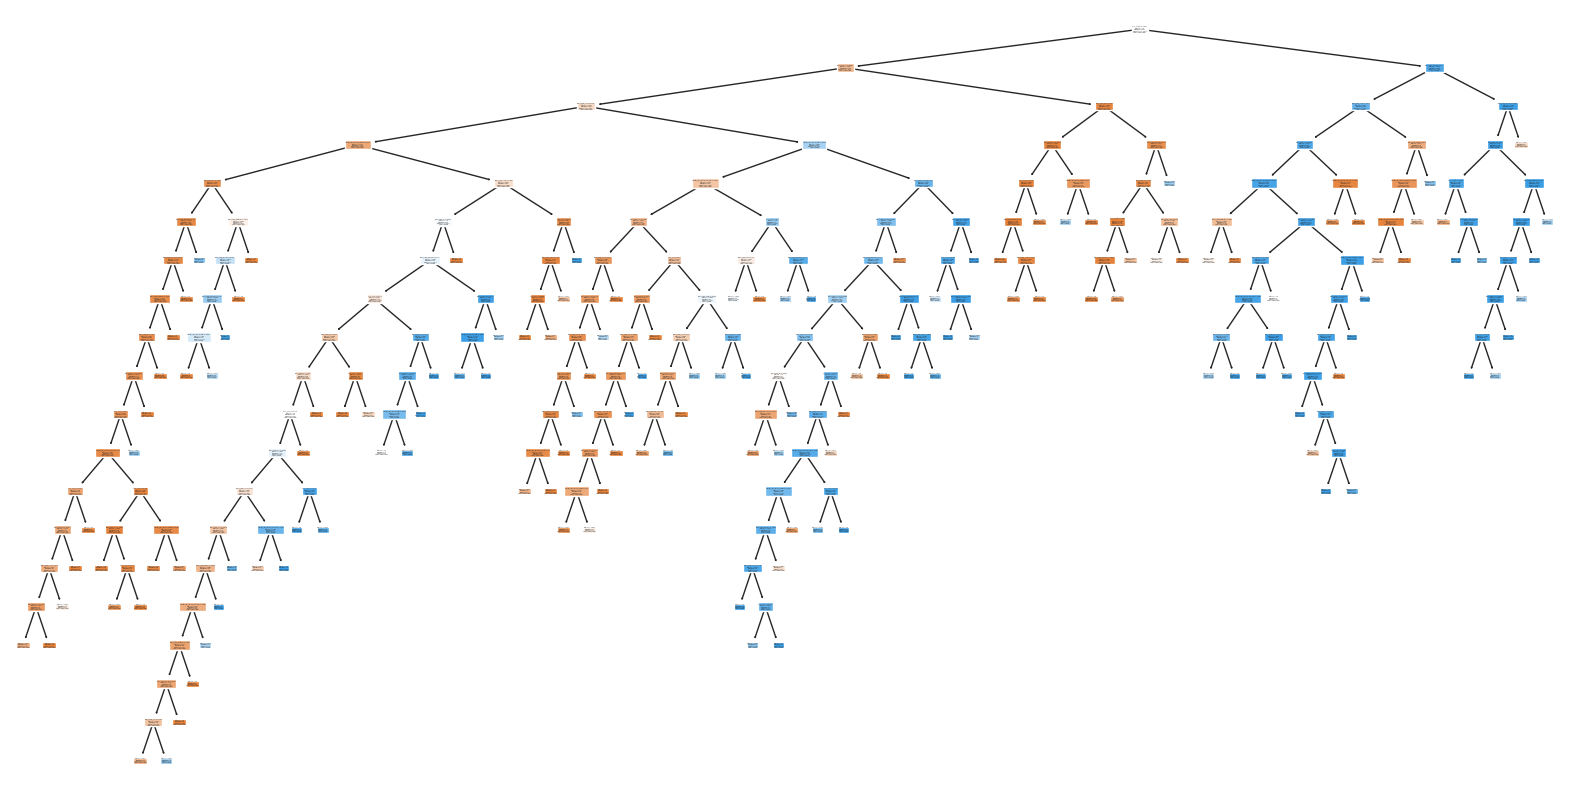

In [390]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the Decision Tree model
tree = DecisionTreeClassifier(random_state=1)

# hyperparameters Search
parameters  = {"max_depth": [None, 3, 5, 7, 9, 11, 13, 15, 17, 19],
              "max_features": [3, 5, 7, 9, 11, 13,],
              "min_samples_leaf": [randint(1, 9)],
              "min_samples_split": [2, 5, 10, 15, 20, 25, 30],
              "criterion": ["gini", "entropy"]}


# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(tree, param_grid=parameters, cv=5)
gridSearch.fit(X_train_scaled, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))

# Printing classification report
print(classification_report(y_test, test_pred))

plt.figure(figsize=(20, 10))
plot_tree(gridSearch.best_estimator_, feature_names=X_train.columns, class_names=['Non-Spam', 'Spam'], filled=True)
plt.show()
# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Append the evaluation metrics to the global list
all_eval_metrics.append([accuracy, precision, recall, f1])

# Without PCA And Using QuantileTransformer (Model Name = DT_QT)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 13, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best training Score: 0.9179972806773586
Testing Set Accuracy: 0.9109263657957245
Training Set Accuracy: 0.9530318091451292
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       519
           1       0.87      0.91      0.89       323

    accuracy                           0.91       842
   macro avg       0.90      0.91      0.91       842
weighted avg       0.91      0.91      0.91       842



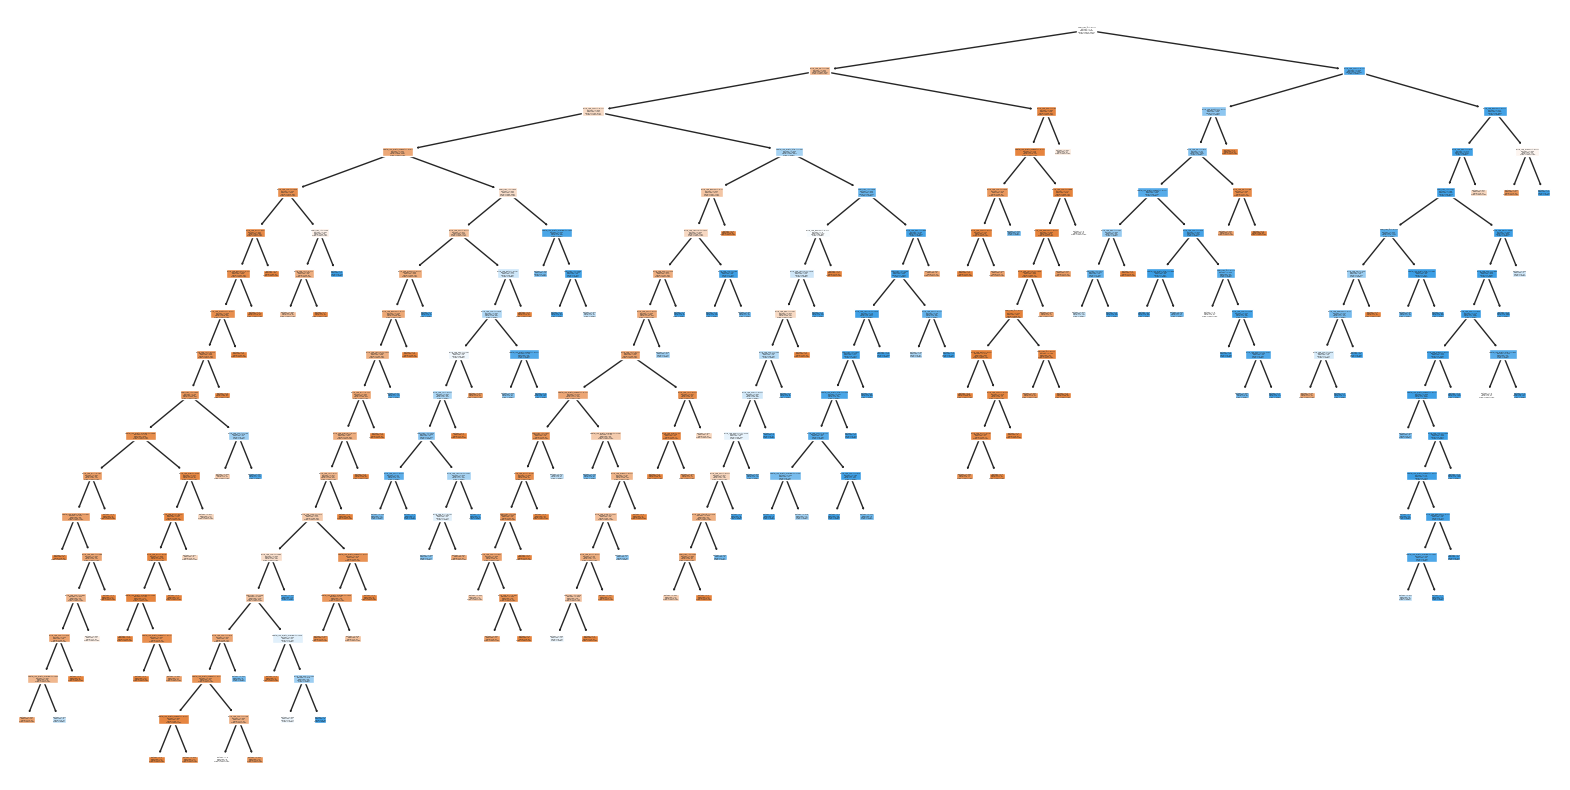

In [391]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using QuantileTransformer
scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating the Decision Tree model
tree = DecisionTreeClassifier(random_state=1)

# hyperparameters Search
parameters  = {"max_depth": [None, 3, 5, 7, 9, 11, 13, 15, 17, 19],
              "max_features": [3, 5, 7, 9, 11, 13,],
              "min_samples_leaf": [randint(1, 9)],
              "min_samples_split": [2, 5, 10, 15, 20, 25, 30],
              "criterion": ["gini", "entropy"]}


# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(tree, param_grid=parameters, cv=5)
gridSearch.fit(X_train_scaled, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))

# Printing classification report
print(classification_report(y_test, test_pred))

plt.figure(figsize=(20, 10))
plot_tree(gridSearch.best_estimator_, feature_names=X_train.columns, class_names=['Non-Spam', 'Spam'], filled=True)
plt.show()
# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_scaled)
train_pred = gridSearch.predict(X_train_scaled)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Append the evaluation metrics to the global list
all_eval_metrics.append([accuracy, precision, recall, f1])

# With PCA And Using StandardScaler (Model Name = DT_PCA_SS)

Best parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 11, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best training Score: 0.8896699731157875
Testing Set Accuracy: 0.8776722090261283
Training Set Accuracy: 0.9530318091451292
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       519
           1       0.81      0.90      0.85       323

    accuracy                           0.88       842
   macro avg       0.87      0.88      0.87       842
weighted avg       0.88      0.88      0.88       842



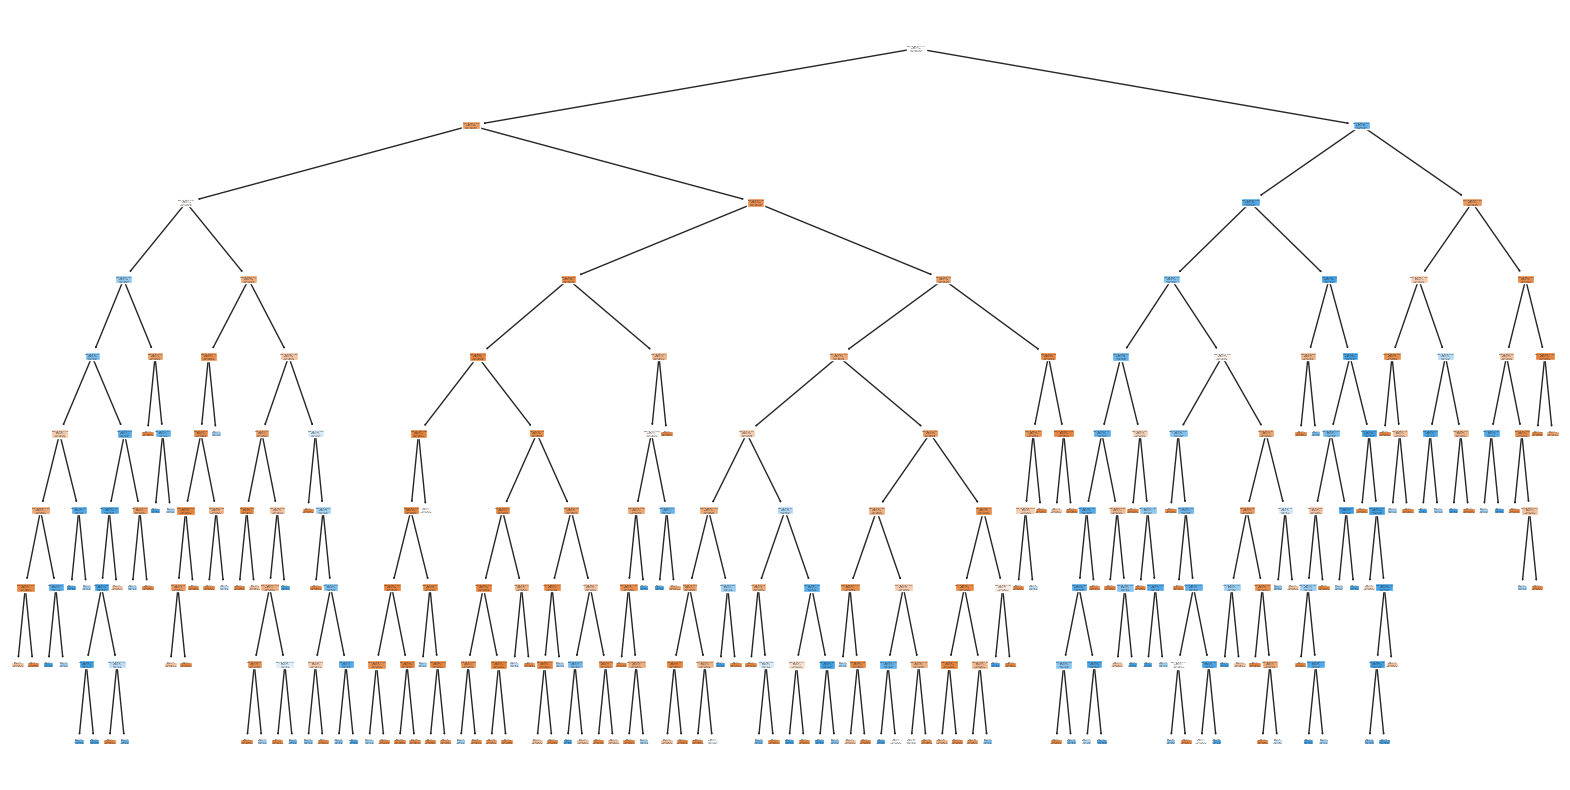

In [392]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA for dimensionality reduction
pca = PCA(0.8)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Creating the Decision Tree model
tree = DecisionTreeClassifier(random_state=1)

# hyperparameters Search
parameters  = {"max_depth": [None, 3, 5, 7, 9, 11, 13, 15, 17, 19],
              "max_features": [3, 5, 7, 9, 11, 13,],
              "min_samples_leaf": [randint(1, 9)],
              "min_samples_split": [2, 5, 10, 15, 20, 25, 30],
              "criterion": ["gini", "entropy"]}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(tree, param_grid=parameters, cv=5)
gridSearch.fit(X_train_pca, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_pca)
train_pred = gridSearch.predict(X_train_pca)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))

# Printing classification report
print(classification_report(y_test, test_pred))

plt.figure(figsize=(20, 10))
plot_tree(gridSearch.best_estimator_, feature_names=X_train.columns, class_names=['Non-Spam', 'Spam'], filled=True)
plt.show()
# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_pca)
train_pred = gridSearch.predict(X_train_pca)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Append the evaluation metrics to the global list
all_eval_metrics.append([accuracy, precision, recall, f1])

# With PCA And Using MinMaxScaler (Model Name = DT_PCA_MM)

Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 9, 'min_samples_leaf': 9, 'min_samples_split': 20}
Best training Score: 0.8593501436914804
Testing Set Accuracy: 0.827790973871734
Training Set Accuracy: 0.8988568588469185
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       519
           1       0.76      0.81      0.78       323

    accuracy                           0.83       842
   macro avg       0.82      0.82      0.82       842
weighted avg       0.83      0.83      0.83       842



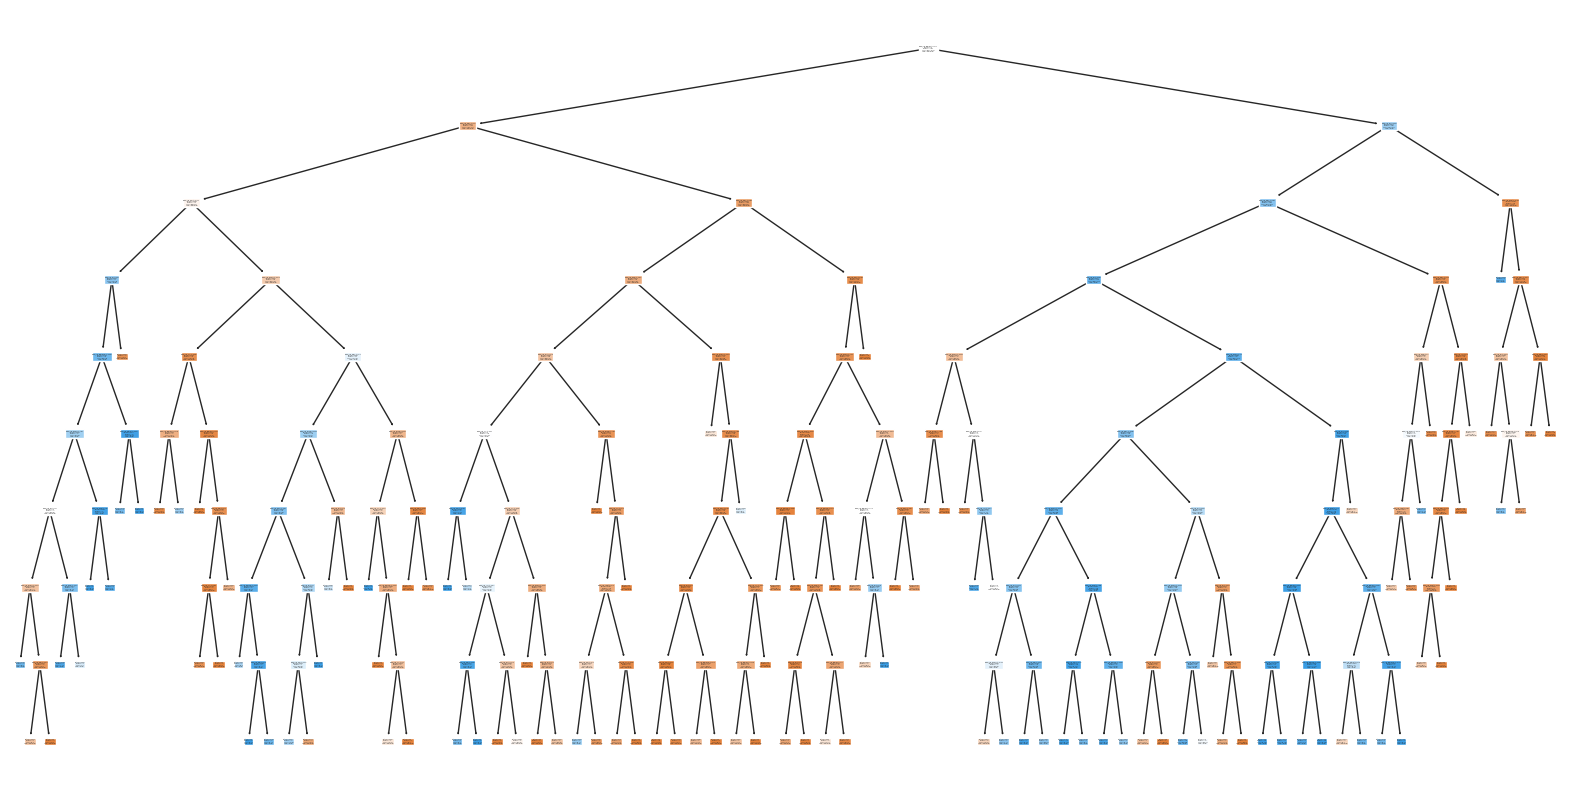

In [393]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Creating the Decision Tree model
tree = DecisionTreeClassifier(random_state=1)

# hyperparameters Search
parameters  = {"max_depth": [None, 3, 5, 7, 9, 11, 13, 15, 17, 19],
              "max_features": [3, 5, 7, 9, 11, 13,],
              "min_samples_leaf": [randint(1, 9)],
              "min_samples_split": [2, 5, 10, 15, 20, 25, 30],
              "criterion": ["gini", "entropy"]}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(tree, param_grid=parameters, cv=5)
gridSearch.fit(X_train_pca, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_pca)
train_pred = gridSearch.predict(X_train_pca)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))

# Printing classification report
print(classification_report(y_test, test_pred))

plt.figure(figsize=(20, 10))
plot_tree(gridSearch.best_estimator_, feature_names=X_train.columns, class_names=['Non-Spam', 'Spam'], filled=True)
plt.show()
# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_pca)
train_pred = gridSearch.predict(X_train_pca)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Append the evaluation metrics to the global list
all_eval_metrics.append([accuracy, precision, recall, f1])

# With PCA And Using QuantileTransformer (Model Name = DT_PCA_QT)

Best parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 13, 'min_samples_leaf': 1, 'min_samples_split': 15}
Best training Score: 0.915512190599796
Testing Set Accuracy: 0.9097387173396675
Training Set Accuracy: 0.9505467196819085
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       519
           1       0.87      0.89      0.88       323

    accuracy                           0.91       842
   macro avg       0.90      0.91      0.91       842
weighted avg       0.91      0.91      0.91       842



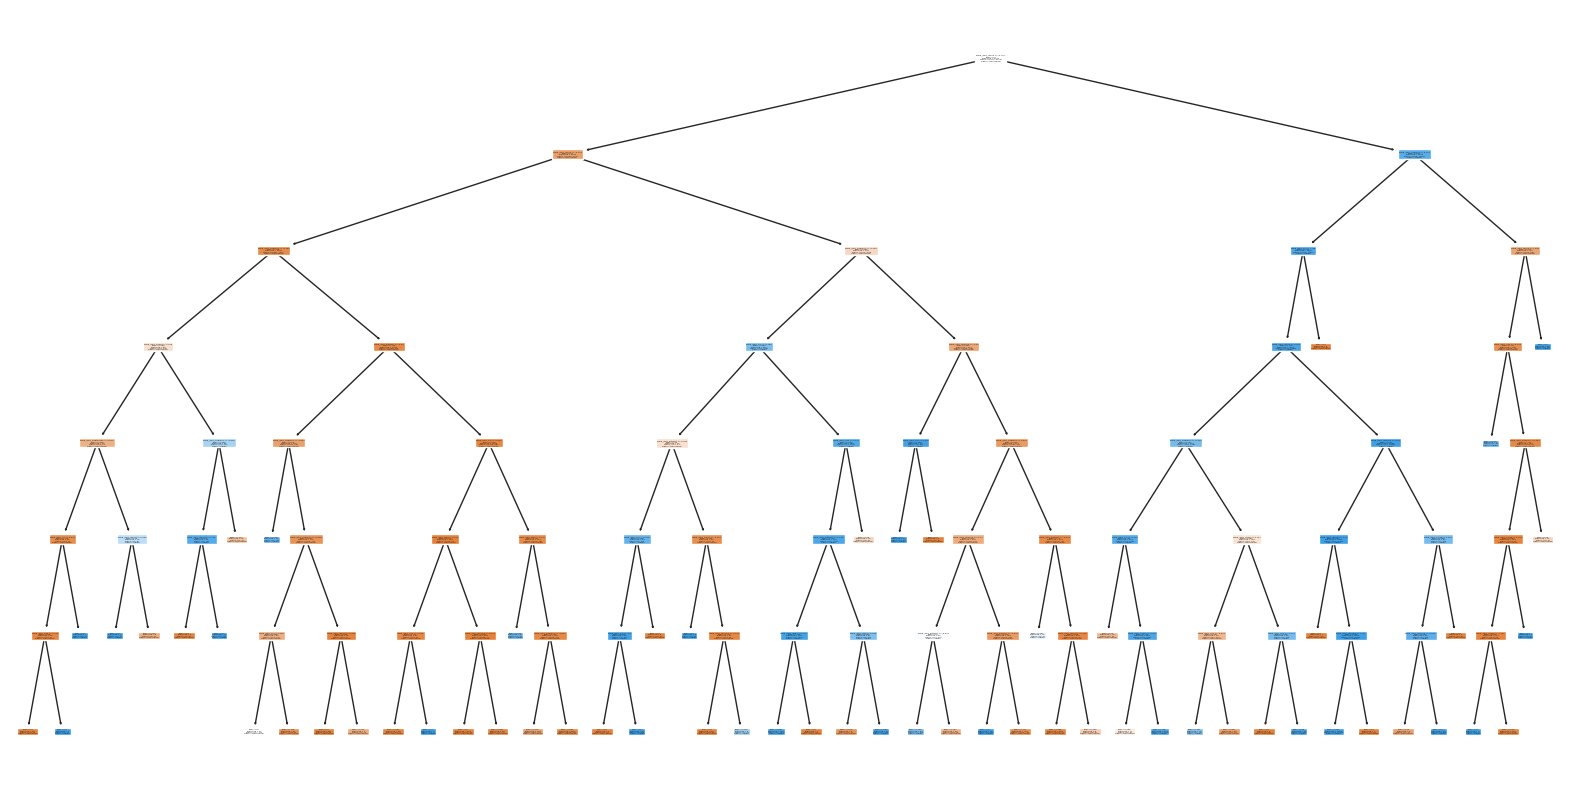

In [394]:
# Load the data
spam_train = pd.read_csv("spam_final_train.csv")
X_train = spam_train.drop(['spam'], axis=1)
y_train = spam_train['spam']

spam_test = pd.read_csv("spam_final_test.csv")
X_test = spam_test.drop(['spam'], axis=1)
y_test = spam_test['spam']

# Scale the features using QuantileTransformer
scaler = QuantileTransformer()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Creating the Decision Tree model
tree = DecisionTreeClassifier(random_state=1)

# hyperparameters Search
parameters  = {"max_depth": [None, 3, 5, 7, 9, 11, 13, 15, 17, 19],
              "max_features": [3, 5, 7, 9, 11, 13,],
              "min_samples_leaf": [randint(1, 9)],
              "min_samples_split": [2, 5, 10, 15, 20, 25, 30],
              "criterion": ["gini", "entropy"]}

# Tuning hyperparameters by using cross-validation method
gridSearch = GridSearchCV(tree, param_grid=parameters, cv=5)
gridSearch.fit(X_train_pca, y_train)

print("Best parameters:", gridSearch.best_params_)
print("Best training Score:", gridSearch.best_score_)

# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_pca)
train_pred = gridSearch.predict(X_train_pca)
print('Testing Set Accuracy:', accuracy_score(y_test, test_pred))
print('Training Set Accuracy:', accuracy_score(y_train, train_pred))

# Printing classification report
print(classification_report(y_test, test_pred))

plt.figure(figsize=(20, 10))
plot_tree(gridSearch.best_estimator_, feature_names=X_train.columns, class_names=['Non-Spam', 'Spam'], filled=True)
plt.show()
# Evaluate the model on testing set
test_pred = gridSearch.predict(X_test_pca)
train_pred = gridSearch.predict(X_train_pca)
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)

# Append the evaluation metrics to the global list
all_eval_metrics.append([accuracy, precision, recall, f1])

# Evaluation

This is a summary of how the above models performed. More detailed information about the model's performance is under each model.

<AxesSubplot:>

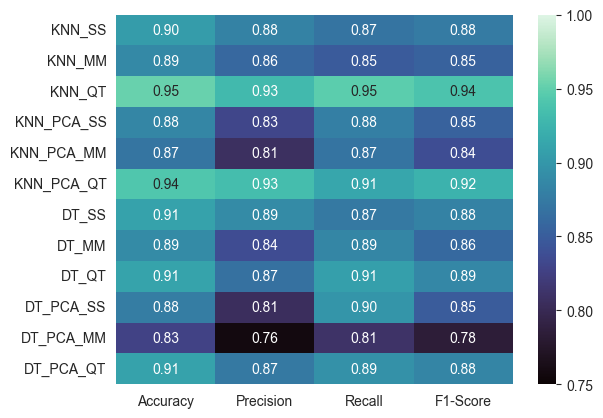

In [405]:
# Adding Model Names
modelNames = ['KNN_SS', 'KNN_MM', 'KNN_QT','KNN_PCA_SS', 'KNN_PCA_MM', 'KNN_PCA_QT','DT_SS', 'DT_MM', 'DT_QT','DT_PCA_SS',
               'DT_PCA_MM', 'DT_PCA_QT']
evalMetrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# create a pandas DataFrame
df = pd.DataFrame(all_eval_metrics, columns=evalMetrics, index=modelNames)

# plot the DataFrame as a heatmap using Seaborn
sns.heatmap(df, annot=True, vmin=0.75, vmax=1, cmap='mako', fmt='.2f')
